
#Preparation


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import re

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Creating CSV Files from all sqlite files

In [2]:
# Path to my Scenario 1 ( No logging + Normal Usage Scenario) sqlite file
db_path = '/content/drive/MyDrive/Master/DB/Performance/perf_normal_op.db'

# Connect to the database
conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

# Execute the Querry and read it in the pandas Dataframe
df = pd.read_sql_query(query, conn)

# Creating a 'datetime' column
df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

df_normal_operation = df

# Make a new column consisting of the sum of the LAST_EXEC_DURATION from both Tasks
df_normal_operation['Total_Exec_Duration'] = (
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

# Make a new column consisting of the sum of the LAST_ACTIVATION_DELAY from both Tasks
df_normal_operation['Total_Activation_delay'] = (
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

# Save the DataFrame to a CSV file
df_normal_operation.to_csv('/content/drive/MyDrive/Master/DB/Performance/perf_DB_normal_operation.csv', index=False)

# Close the database connection
conn.close()

In [3]:
# Path to my Scenario 2 ( Logging enabled + Normal Usage Scenario) sqlite file
db_path = '/content/drive/MyDrive/Master/DB/Performance/perf_log_en.db'

# Connect to the database
conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

# Execute the Querry and read it in the pandas Dataframe
df = pd.read_sql_query(query, conn)

# Creating a 'datetime' column
df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

df_logging_enable = df

# Make a new column consisting of the sum of the LAST_EXEC_DURATION from both Tasks
df_logging_enable['Total_Exec_Duration'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

# Make a new column consisting of the sum of the LAST_ACTIVATION_DELAY from both Tasks
df_logging_enable['Total_Activation_delay'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

# Save the DataFrame to a CSV file
df_logging_enable.to_csv('/content/drive/MyDrive/Master/DB/Performance/perf_DB_logging_enable.csv', index=False)

# Close the database connection
conn.close()

In [4]:
# Path to my Scenario 3 ( Logging enabled + Attacking Scenario) sqlite file
db_path = '/content/drive/MyDrive/Master/DB/Performance/perf_log_attack.db'

# Connect to the database
conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

# Execute the Querry and read it in the pandas Dataframe
df = pd.read_sql_query(query, conn)

# Creating a 'datetime' column
df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

time_filter = (
    ((df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 21) & (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] >= 57)) |
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 22) |
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 23) |
    ((df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 0) & (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] <= 10))
)

# Applying the filter
df_logging_attack = df[time_filter].reset_index(drop=True)

# Make a new column consisting of the sum of the LAST_EXEC_DURATION from both Tasks
df_logging_attack['Total_Exec_Duration'] = (
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

# Make a new column consisting of the sum of the LAST_ACTIVATION_DELAY from both Tasks
df_logging_attack['Total_Activation_delay'] = (
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

# Save the DataFrame to a CSV file
df_logging_attack.to_csv('/content/drive/MyDrive/Master/DB/Performance/perf_DB_logging_attack.csv', index=False)

# Close the database connection
conn.close()

###This contains the extraction of the Stress test for the Execution Count

In [5]:
# Path to my Stress Test
db_path = '/content/drive/MyDrive/Master/DB/Performance/perf_stress_test.db'

# Connect to the database
conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

# Execute the Querry and read it in the pandas Dataframe
df = pd.read_sql_query(query, conn)

# Create a 'datetime' column
df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)


# Creating a filter to match the time 23:56:56 when the Stress Test started
split_time = (
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 23) &
    (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] == 56) &
    (df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'] == 00)
)

split_index = df[split_time].index[0]

# Splitting the dataframe
df_stress_test = df.iloc[split_index:].reset_index(drop=True)



df_stress_test['Total_Exec_Duration'] = (
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_stress_test['Total_Activation_delay'] = (
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

# Saving the DataFrame to CSV files
df_stress_test.to_csv('/content/drive/MyDrive/Master/DB/Performance/perf_DB_stress_test.csv', index=False)

# Close the database connection
conn.close()

#Analyzing

##Memory Usage


In [15]:
import pandas as pd

def compare_memory_usage(df1, df2, df3, names):

    dfs = [df1, df2, df3]
    stats = []

    def fit_slope(x, y):
        m, b = np.polyfit(x, y, 1)
        return m, b

    for i, df in enumerate(dfs):

        used_memory_rate = (df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].diff().mean()) / (df.index[1] - df.index[0]) if len(df) > 1 else 0
        avg_free_memory = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_FREE'].mean()
        max_used_memory = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].max()
        min_used_memory = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].min()

        stats.append({
            'Scenario': names[i],
            'Used Memory Rate': used_memory_rate,
            'Average Free Memory': avg_free_memory,
            'Max Used Memory': max_used_memory,
            'Min Used Memory': min_used_memory
        })

        x = df.index
        y = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED']
        m, b = fit_slope(x, y)
        plt.figure(figsize=(12, 6))
        plt.plot(x, y, label=f'{names[i]} - Memory Used', color='blue')
        plt.plot(x, m * x + b, label=f'Slope: y = {b:.2f} + {m:.2f}x', color='red', linestyle='--')
        plt.title(f'{names[i]} Memory Usage Over Time with Slope')
        plt.xlabel('Index')
        plt.ylabel('Used Memory')
        plt.grid(True)
        plt.legend()
        plt.show()

    stats_df = pd.DataFrame(stats)
    print(stats_df)


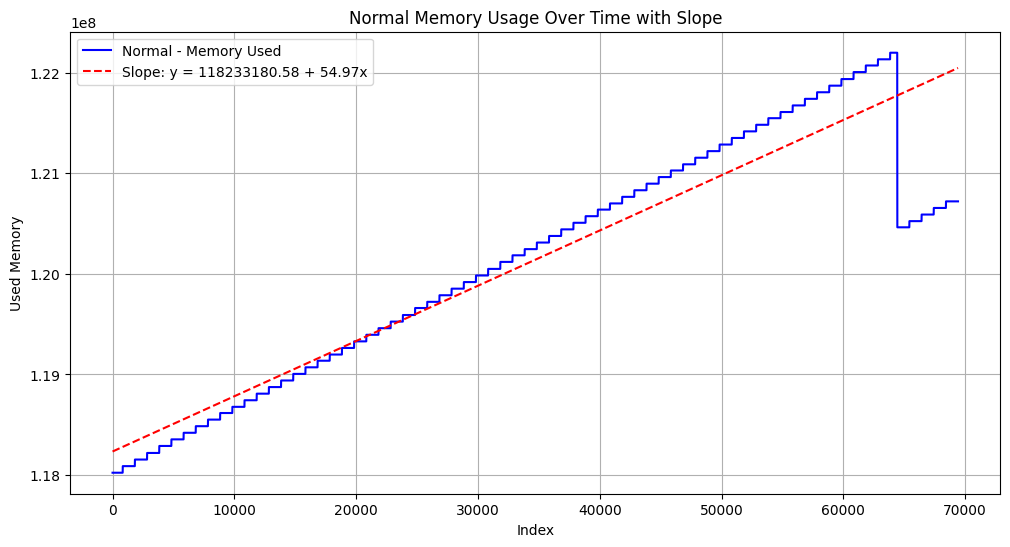

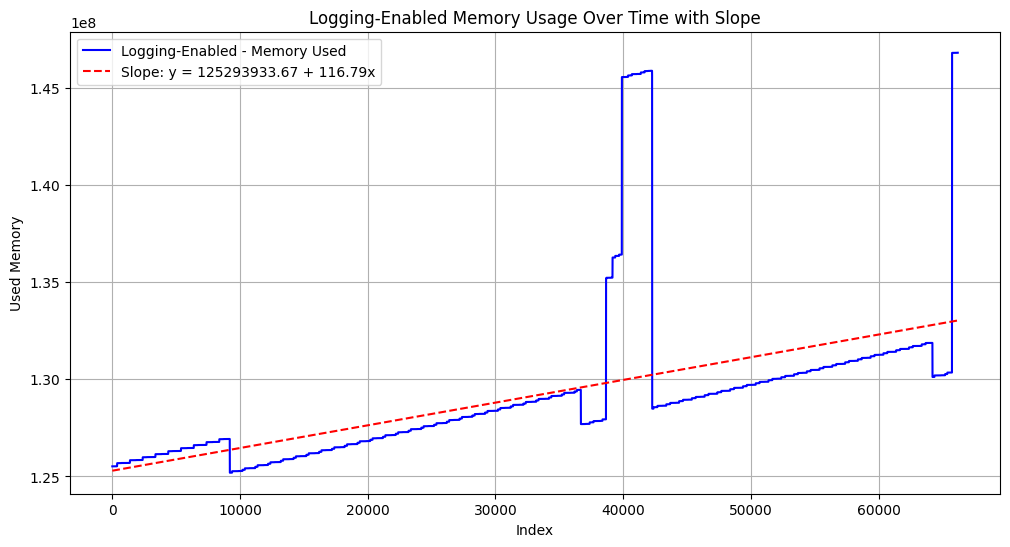

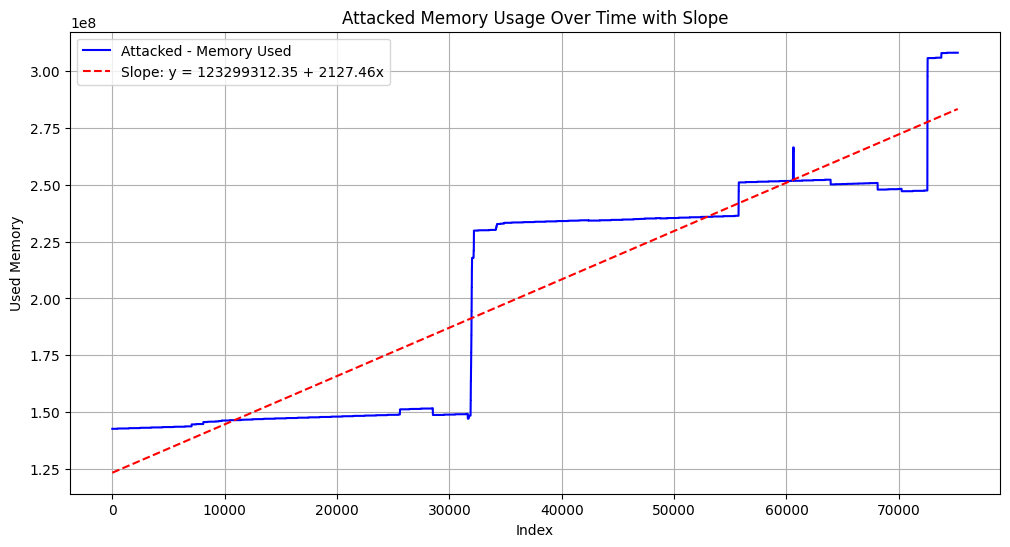

          Scenario  Used Memory Rate  Average Free Memory  Max Used Memory  \
0           Normal         38.890932         3.539302e+08        122200064   
1  Logging-Enabled        321.559419         3.449114e+08        146804736   
2         Attacked       2199.680519         2.707292e+08        308142080   

   Min Used Memory  
0        118022144  
1        125190144  
2        142622720  


In [16]:
compare_memory_usage(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])


##Cycle time

In [17]:
def compare_cycle_times(df1, df2, df3, names):
    dfs = [df1, df2, df3]
    stats = []

    for i, df in enumerate(dfs):
        stats.append({
            'Name': names[i],
            'Mean': df.mean(),
            'Median': df.median(),
            'Max': df.max(),
            'Min': df.min(),
            'Std': df.std(),
            'Number of Outliers': len(df[(df > df.quantile(0.95)) | (df < df.quantile(0.05))]),
            '25th Percentile': df.quantile(0.25),
            '50th Percentile': df.quantile(0.50),
            '75th Percentile': df.quantile(0.75)

        })

    stats_df = pd.DataFrame(stats)
    print(stats_df)

    plt.figure(figsize=(14, 6))
    for i, df in enumerate(dfs):
        plt.plot(df, label=names[i])
    plt.title('Cycle Time Trend Over Time')
    plt.xlabel('Index')
    plt.ylabel('Cycle Time (ms)')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[df1.values, df2.values, df3.values], orient="h")
    plt.title('Cycle Time Boxplot Comparison')
    plt.yticks([0, 1, 2], names)
    plt.xlabel('Cycle Time (ms)')
    plt.gca().set_ylabel('')
    plt.grid(True)
    plt.show()



                             Name        Mean  Median   Max  Min         Std  \
0           Normal Execution Time  436.264815   402.0  1583  306   94.842658   
1  Logging-Enabled Execution Time  529.154985   516.0  1682  309  142.885182   
2         Attacked Execution Time  508.804181   447.0  2131    0  143.058433   

   Number of Outliers  25th Percentile  50th Percentile  75th Percentile  
0                6678            384.0            402.0            429.0  
1                6578            409.0            516.0            574.0  
2                7368            406.0            447.0            575.0  


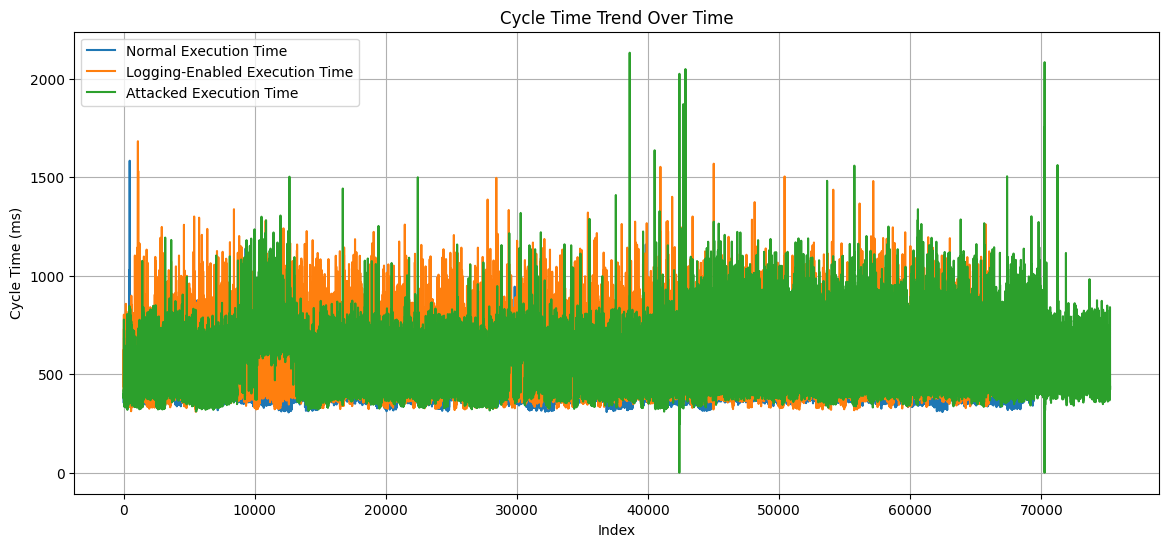

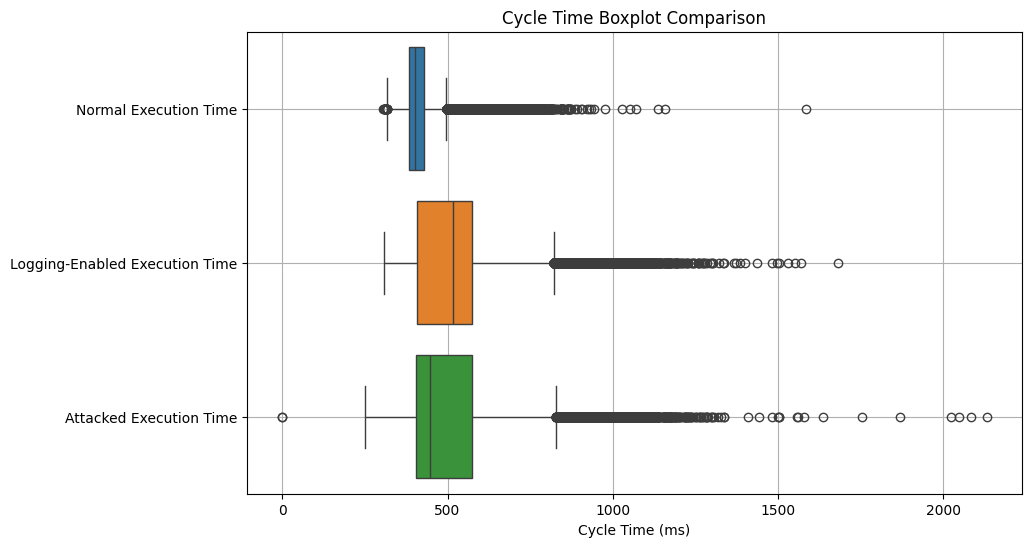

In [18]:
compare_cycle_times(df_normal_operation['Total_Exec_Duration'], df_logging_enable['Total_Exec_Duration'], df_logging_attack['Total_Exec_Duration'], ['Normal Execution Time', 'Logging-Enabled Execution Time', 'Attacked Execution Time'])

                         Name        Mean  Median    Max  Min        Std  \
0           Normal Delay Time   94.715346    93.0    278   69  11.107644   
1  Logging-Enabled Delay Time  115.684985   104.0    346   68  34.529544   
2         Attacked Delay Time  116.957913   100.0  13598    0  65.238848   

   Number of Outliers  25th Percentile  50th Percentile  75th Percentile  
0                5381             87.0             93.0            101.0  
1                6302             94.0            104.0            122.0  
2                7017             91.0            100.0            121.0  


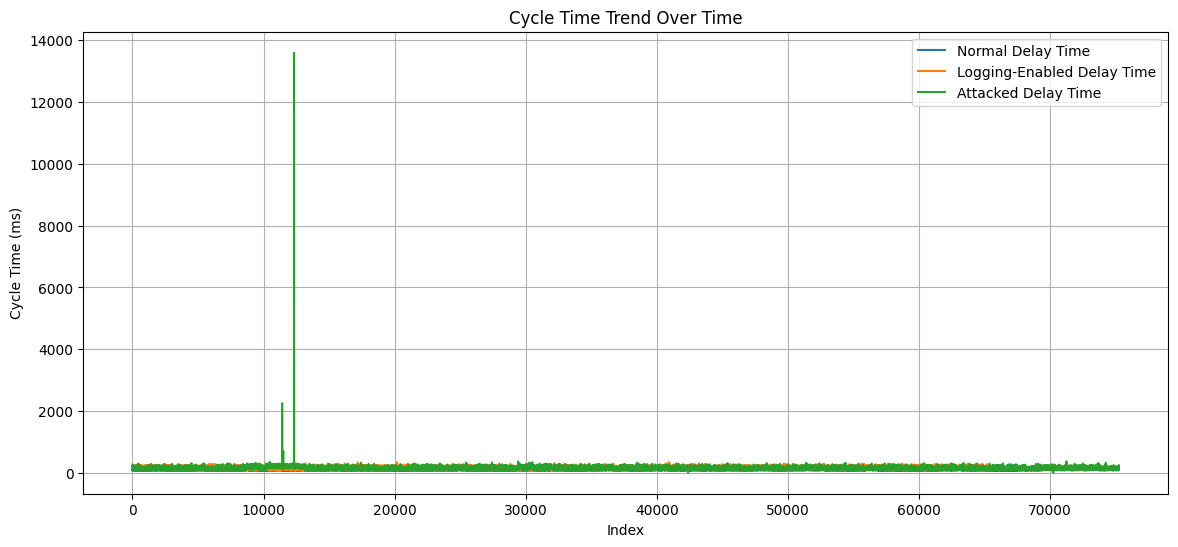

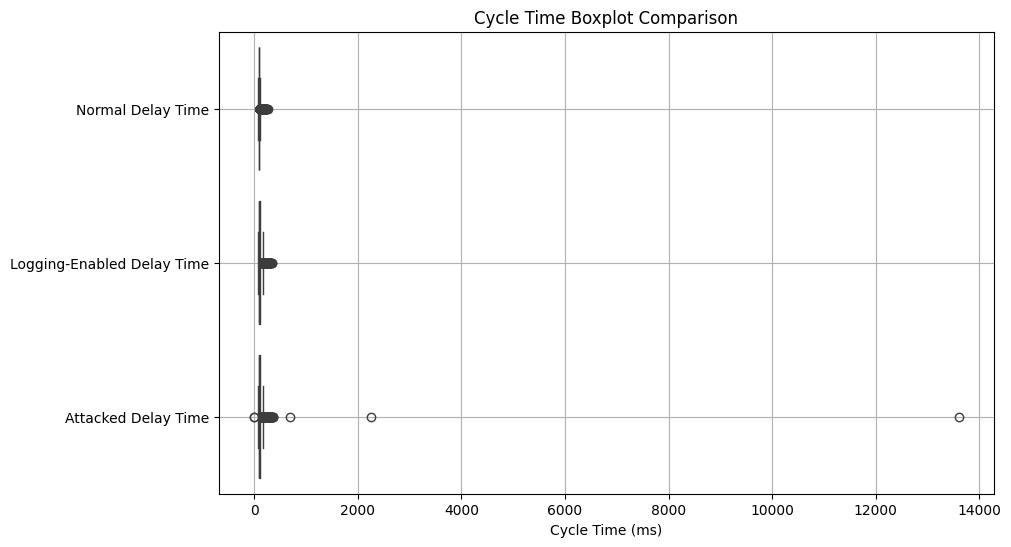

In [19]:
compare_cycle_times(df_normal_operation['Total_Activation_delay'], df_logging_enable['Total_Activation_delay'], df_logging_attack['Total_Activation_delay'], ['Normal Delay Time', 'Logging-Enabled Delay Time', 'Attacked Delay Time'])

##Exception Count

In [20]:
df_stress_test['Arp.Plc.Eclr/code.temp'].describe()

,Arp.Plc.Eclr/code.temp
count,11561.00000
mean,56.70833
std,0.51588
min,56.00000
25%,56.00000
50%,57.00000
75%,57.00000
max,58.00000


##Temprature

In [21]:
def compare_temperature_with_regression(df1, df2, df3, names):

    dfs = [df1, df2, df3]
    stats = []

    def fit_slope_with_regression(x, y):
        x = x.values.reshape(-1, 1)
        y = y.astype(float)

        model = LinearRegression()
        model.fit(x, y)

        m = model.coef_[0]
        b = model.intercept_
        print(f"Slope (m) and Intercept (b) using Regression for {names}: m = {m}, b = {b}")
        return m, b

    for i, df in enumerate(dfs):

        df['Arp.Plc.Eclr/code.temp'] = df['Arp.Plc.Eclr/code.temp'].astype(float)

        temp_change_rate = (df['Arp.Plc.Eclr/code.temp'].diff().mean()) / (df.index[1] - df.index[0]) if len(df) > 1 else 0
        avg_temperature = df['Arp.Plc.Eclr/code.temp'].mean()
        max_temperature = df['Arp.Plc.Eclr/code.temp'].max()
        min_temperature = df['Arp.Plc.Eclr/code.temp'].min()

        stats.append({
            'Scenario': names[i],
            'Temperature Change Rate': temp_change_rate,
            'Average Temperature': avg_temperature,
            'Max Temperature': max_temperature,
            'Min Temperature': min_temperature
        })

        x = df.index
        y = df['Arp.Plc.Eclr/code.temp']
        m, b = fit_slope_with_regression(x, y)

        plt.figure(figsize=(12, 6))
        plt.plot(x, y, label=f'{names[i]} - Temperature', color='blue')
        plt.plot(x, m * x + b, label=f'Regression Slope', color='red', linestyle='--')
        plt.title(f'{names[i]} Temperature Over Time with Regression Slope')
        plt.xlabel('Index')
        plt.ylabel('Temperature (°C)')
        plt.grid(True)
        plt.legend()
        plt.show()

    stats_df = pd.DataFrame(stats)
    print(stats_df)


Slope (m) and Intercept (b) using Regression for ['Normal', 'Logging-Enabled', 'Attacked']: m = 0.0, b = 57.0


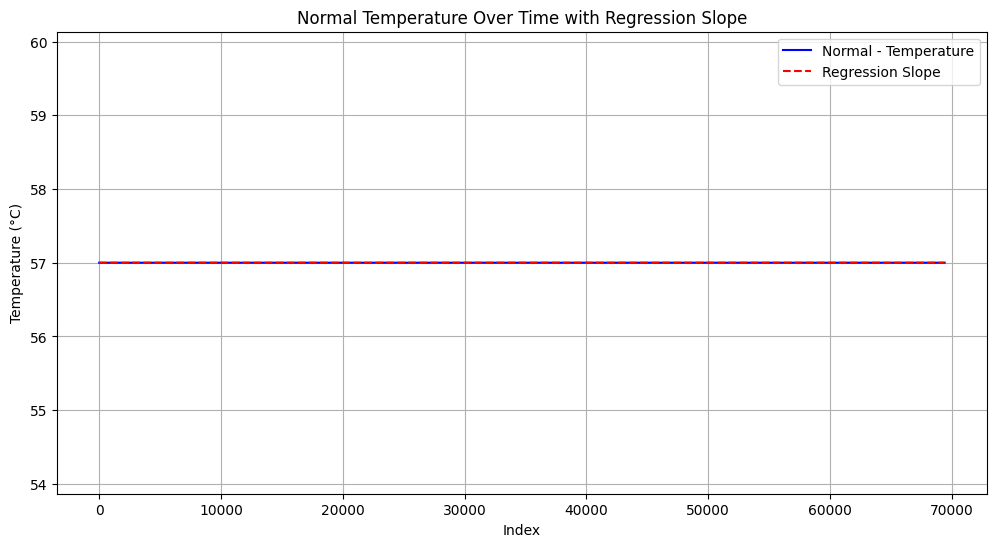

Slope (m) and Intercept (b) using Regression for ['Normal', 'Logging-Enabled', 'Attacked']: m = 3.263394886695842e-05, b = 56.44119212609442


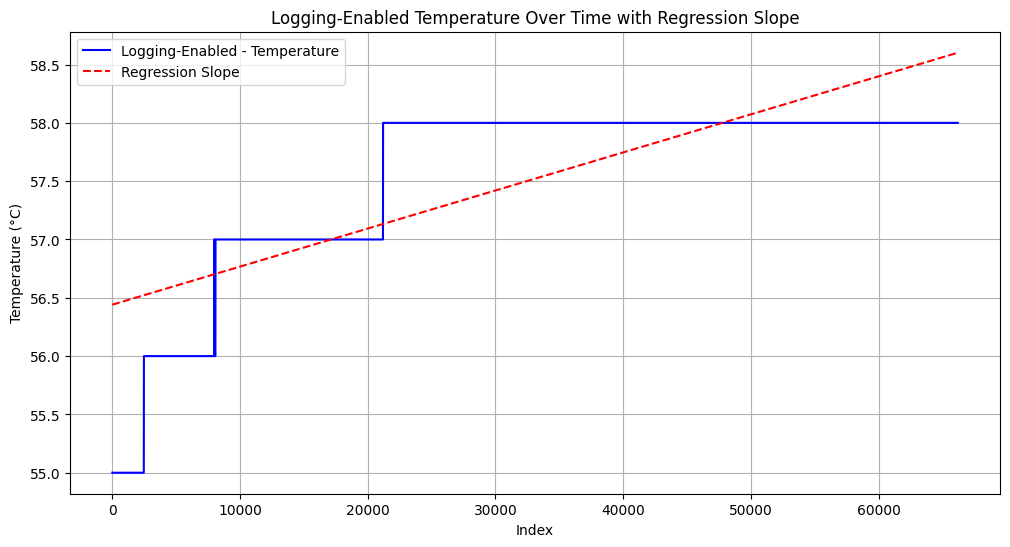

Slope (m) and Intercept (b) using Regression for ['Normal', 'Logging-Enabled', 'Attacked']: m = -3.1720364454454667e-06, b = 56.18228166306701


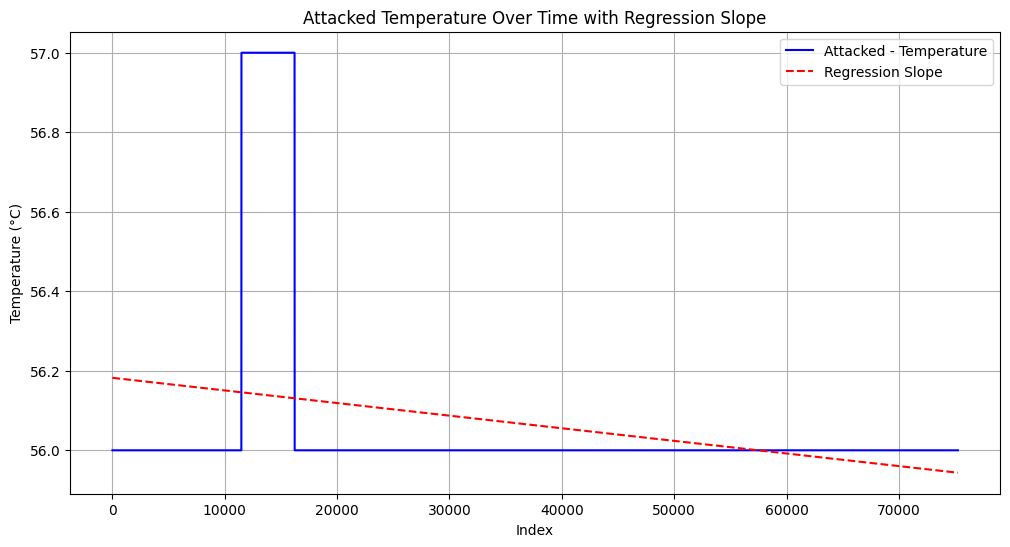

          Scenario  Temperature Change Rate  Average Temperature  \
0           Normal                 0.000000            57.000000   
1  Logging-Enabled                 0.000045            57.521360   
2         Attacked                 0.000000            56.062939   

   Max Temperature  Min Temperature  
0             57.0             57.0  
1             58.0             55.0  
2             57.0             56.0  


In [22]:
compare_temperature_with_regression(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])

##CPU usage

In [23]:
def compare_cpu_usage_separately_with_lines(df1, df2, df3, names):
    dfs = [df1, df2, df3]
    stats = []

    def calculate_stats(df, name):
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        total_points = len(cpu_usage_avg)
        outliers = cpu_usage_avg[(cpu_usage_avg > cpu_usage_avg.quantile(0.95)) | (cpu_usage_avg < cpu_usage_avg.quantile(0.05))]
        num_outliers = len(outliers)
        percentage_outliers = (num_outliers / total_points) * 100
        return {
            'Name': name,
            'Mean': cpu_usage_avg.mean(),
            'Median': cpu_usage_avg.median(),
            'Max': cpu_usage_avg.max(),
            'Min': cpu_usage_avg.min(),
            'Std': cpu_usage_avg.std(),
            'Number of Outliers': num_outliers,
            'Percentage of Outliers (%)': percentage_outliers,
            '25th Percentile': cpu_usage_avg.quantile(0.25),
            '50th Percentile': cpu_usage_avg.quantile(0.50),
            '75th Percentile': cpu_usage_avg.quantile(0.75)
        }

    for i, df in enumerate(dfs):
        stats.append(calculate_stats(df, names[i]))

    stats_df = pd.DataFrame(stats)
    print(stats_df)

    for i, df in enumerate(dfs):
        plt.figure(figsize=(14, 6))
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        plt.plot(cpu_usage_avg, label=f'{names[i]} - Average CPU Usage', color='blue')

        avg_line = [cpu_usage_avg.mean()] * len(cpu_usage_avg)
        plt.plot(cpu_usage_avg.index, avg_line, label='Average Line', linestyle='--', color='orange')

        x = cpu_usage_avg.index.values.reshape(-1, 1)
        y = cpu_usage_avg.values
        reg = LinearRegression().fit(x, y)
        reg_line = reg.predict(x)
        plt.plot(cpu_usage_avg.index, reg_line, label='Regression Line', linestyle='-', color='red')

        plt.title(f'Average CPU Usage Trend Over Time - {names[i]}')
        plt.xlabel('Index')
        plt.ylabel('Average CPU Usage (%)')
        plt.grid(True)
        plt.legend()
        plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[((df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2).values for df in dfs], orient="h")
    plt.title('Average CPU Usage Boxplot Comparison')
    plt.yticks([0, 1, 2], names)
    plt.xlabel('Average CPU Usage (%)')
    plt.gca().set_ylabel('')
    plt.grid(True)
    plt.show()


              Name       Mean  Median    Max   Min        Std  \
0           Normal  10.541401    10.5   57.5  10.0   1.284085   
1  Logging-Enabled  22.858044    17.0   99.5  12.5  14.593169   
2         Attacked  25.874841    15.0  100.0   0.0  21.926848   

   Number of Outliers  Percentage of Outliers (%)  25th Percentile  \
0                3268                    4.708459             10.5   
1                4238                    6.401813             16.5   
2                3685                    4.897140             11.5   

   50th Percentile  75th Percentile  
0             10.5             10.5  
1             17.0             20.0  
2             15.0             31.0  


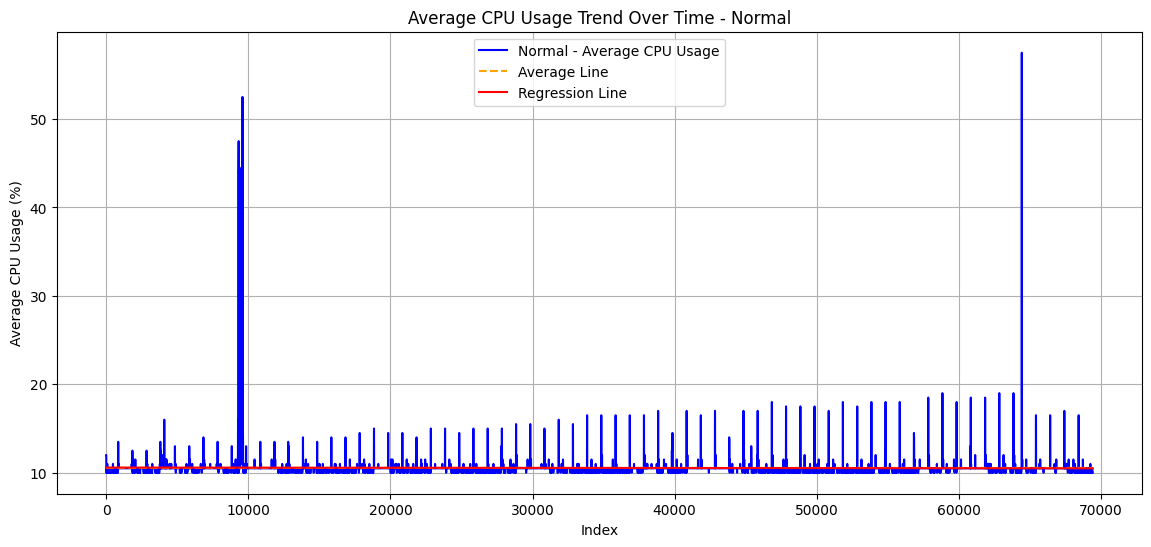

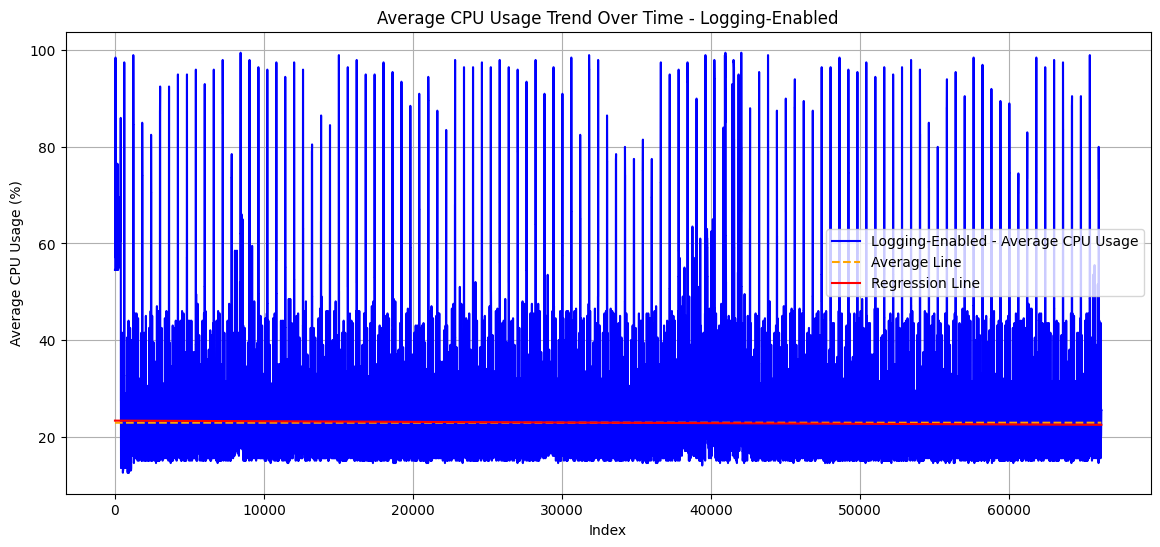

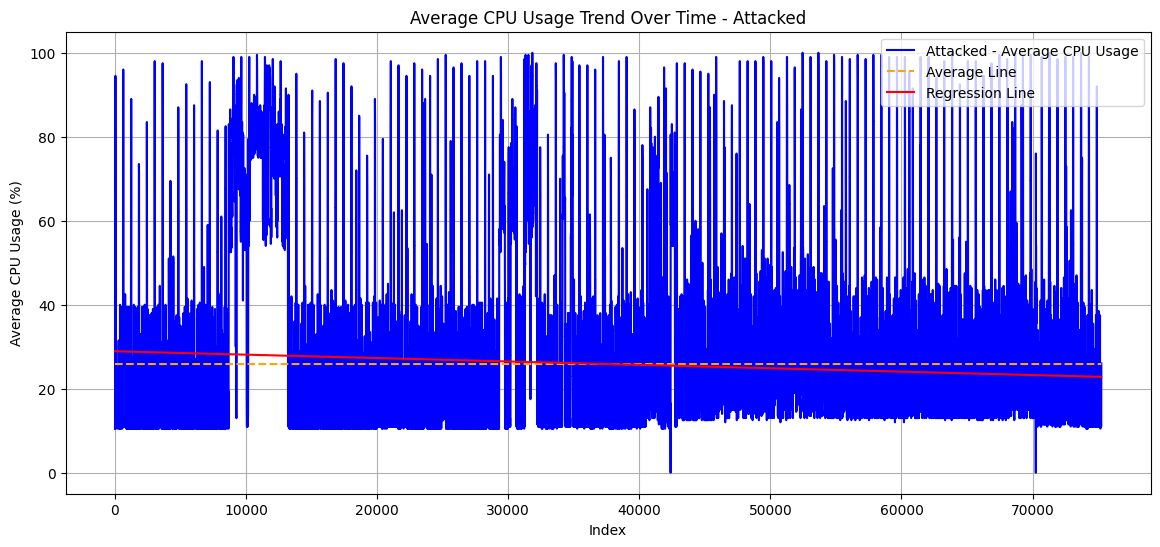

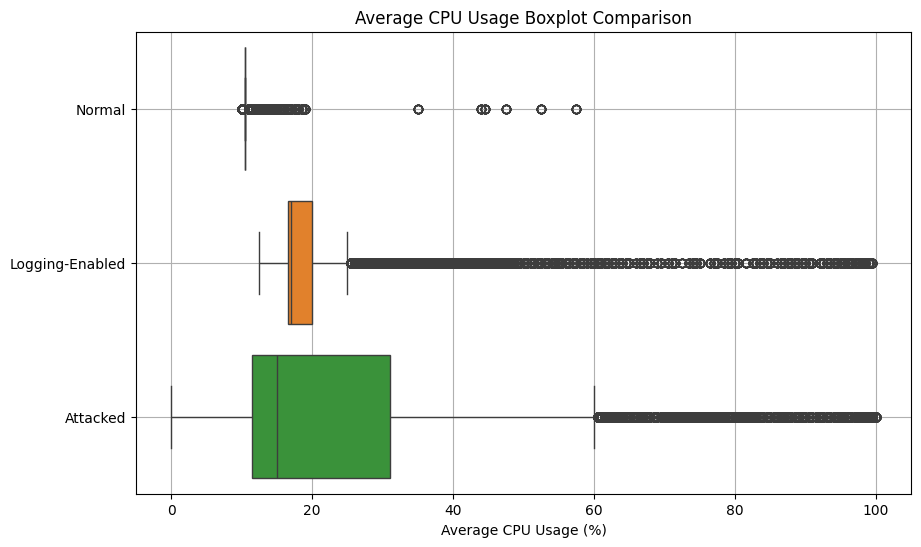

In [24]:
compare_cpu_usage_separately_with_lines(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])